## Madrid Property Analysis

#### 1) Exploratory Data Analysis
- In this step we will discover and visualize the data deeper to gain insights and check for correlations. 

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit

Import the Excel Data as Pandas DataFrame

In [7]:
df = pd.read_csv('../data/split/stratified_train_set.csv')

In [8]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category
0,14891,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,...,2.720731,0.620067,0.239921,45.884872,0.140012,43899,16135,40.553031,410.321496,2
1,639,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,...,2.653121,0.560289,0.194524,29.846836,0.245186,19848,7481,45.669589,21.594146,3
2,13387,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,...,2.960683,0.612718,0.285851,47.817560,0.101431,17847,6028,42.117751,162.889293,2
3,11600,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,...,2.174839,0.354871,0.080247,19.353141,0.564883,24704,11359,46.008905,427.235060,3
4,8597,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,...,2.249305,0.345274,0.062095,23.072299,0.592631,29945,13313,46.234380,388.747885,2


In [9]:
df.shape

(14285, 27)

Our dataset is now smaller, as expected as we have made the split and are currently only exploring the training dataset. We have alot of columns we can potentially explore and hence we will get started by visulaizing the geographical data that we have been provided. 

##### 1.1 Visualizing Geographical Data

Since we are provided with geographical information (latitude and longitude), we can already create a scatterplot of all values to visualize the data. Since the districts and neighborhoods are categorical values, we will take care of them later in the preprocessing. 

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

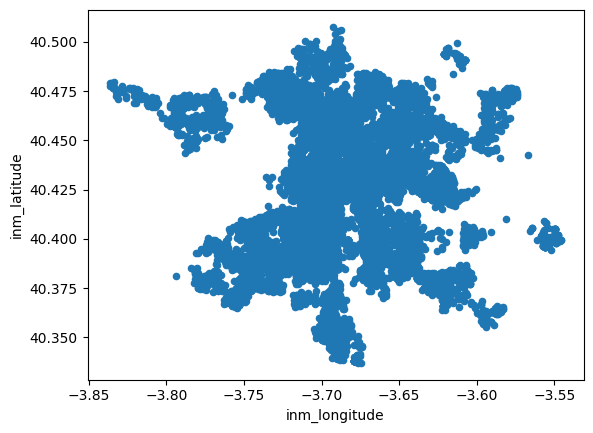

In [16]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude")

This looks like the properties are distributed all over Madrid, but other than that it is hard to see any particular pattern, so we will adjust the alpha value. 

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

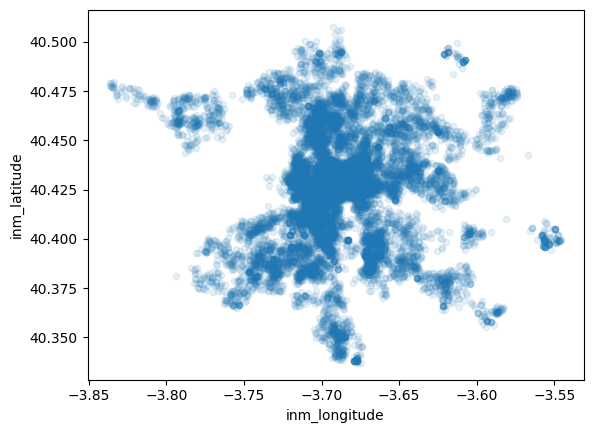

In [17]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude", alpha=0.1)

Now we can clearly see the high-density areas, and judging by the density towards the center we can predict that the most density is in areas like Salamance which are in the center, to be more specific areas such as Alonso Martinez, Tribunal etc. 

<img src="../artifacts/map_overlay.png" alt="Map Overlay" width="750" height="350">

And after cross referencing with a map service, it is true, and from domain knowledge that does make sense. 

We can extend this exploration to the housing prices. We will make a plot which will include the location coordinates, population, and prices now to see if there's a pattern. The radius of each circle represents the area's population, and the color represents the price. We will use a predefined a color map that allows us to easily visualize the different colors. 

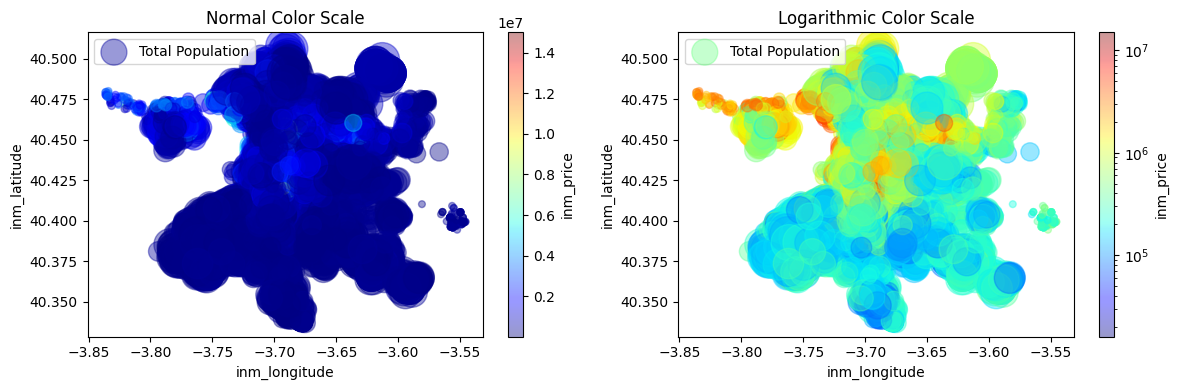

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Set up the matplotlib figure with two subplots, side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Normal color scale scatter plot on the left
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    ax=axes[0]  # This plot will be on the first subplot
)
axes[0].legend()
axes[0].set_title('Normal Color Scale')

# Logarithmic color scale scatter plot on the right
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    norm=LogNorm(),  # Apply a logarithmic scale to the color map
    ax=axes[1]  # This plot will be on the second subplot
)
axes[1].legend()
axes[1].set_title('Logarithmic Color Scale')

plt.tight_layout()  # Adjust the layout so the plots fit into the figure area well
plt.show()


We can see we have 2 outputs, one with the normal color scale, however, it's hard to identify the other colors with this representation. Hence I used a logarithmic color scale, as shown on the right, and we can see that it allows for better visualization of data when there are many low values and a few extremely high values. In this plot, the colors differentiate the data points more distinctly, showing the variation in 'imm_price' among locations that was not as apparent in the normal scale plot.

Looking at the logarithmic plot, we can observe areas with higher 'imm_price' values (warmer colors like red and yellow) and areas with lower values (cooler colors like blue and green). This suggests that there might be a trend or relationship between location (latitude and longitude) and the 'imm_price' variable.

In terms of a trend, the logarithmic plot suggests that there is a clustering of higher values in the center of the plot, which could suggest a trend where certain geographic locations are associated with higher or lower values of 'imm_price.'

##### 1.2 Categorical Features Exploration



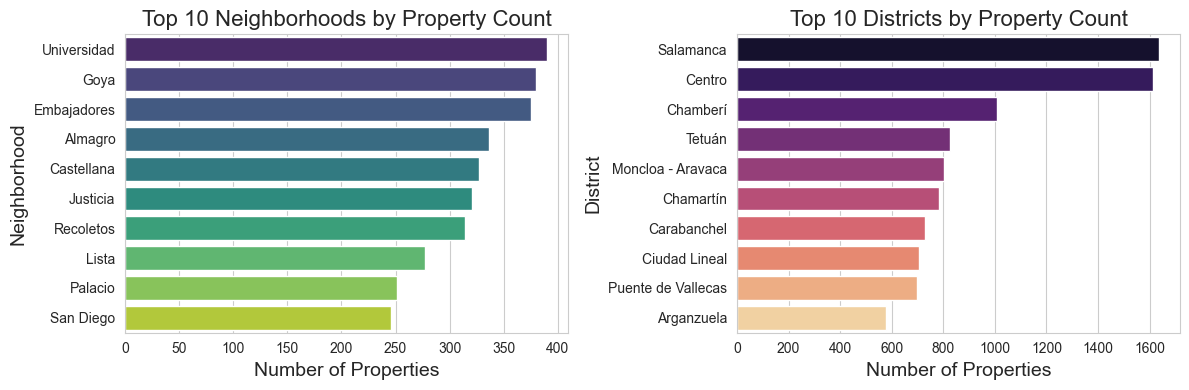

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Create a count plot for neighborhoods
sns.countplot(data=df, y='inm_barrio', order=df['inm_barrio'].value_counts().index[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Neighborhoods by Property Count', fontsize=16)
axes[0].set_xlabel('Number of Properties', fontsize=14)
axes[0].set_ylabel('Neighborhood', fontsize=14)

# Create a count plot for districts
sns.countplot(data=df, y='inm_distrito', order=df['inm_distrito'].value_counts().index[:10], palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Districts by Property Count', fontsize=16)
axes[1].set_xlabel('Number of Properties', fontsize=14)
axes[1].set_ylabel('District', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


We can see after plotting the top 10 neighborhoods and districts by property count, that we were actually right and our analysis with the latitude and longitude was true, as most as in the center. 

##### 1.3 Visualizing Property Data

Based on the previous visualization of the distributions of the numerical variables, we were able to see that the property related variables were very skewed and we will dive deeper by checking the density plots. 

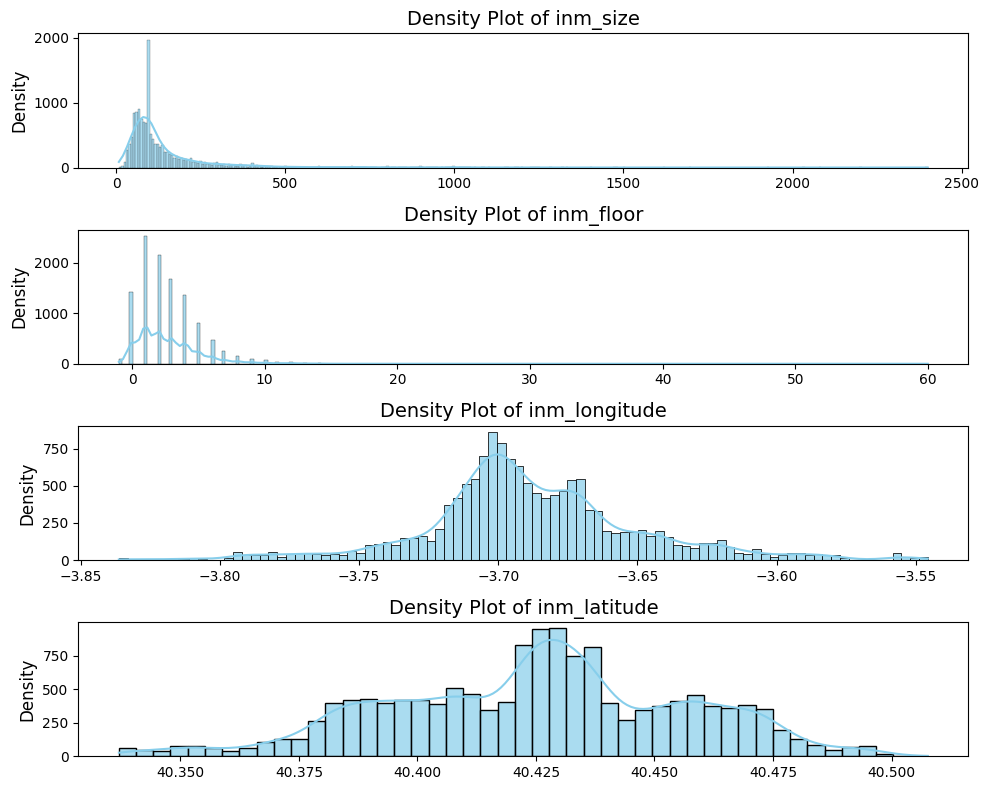

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for density plots
numerical_features = ['inm_size', 'inm_floor', 'inm_longitude', 'inm_latitude']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 8), sharex=False)

# Iterate over numerical features and create density plots
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(f'Density Plot of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

inm_size: The density plot for inm_size is heavily right-skewed, with a peak at the lower end of the size range. This indicates that the majority of the properties are small in size, and there are fewer large properties. There's a long tail extending to the right, suggesting there are outliers with very large sizes.

inm_floor: The inm_floor plot also shows a right-skewness, though not as pronounced as inm_size. Most properties are located on the lower floors, and there are fewer properties as the floor number increases. There are very few properties above floor 20, which might be outliers or represent high-rise buildings.

inm_longitude: The distribution of inm_longitude seems to be multi-modal, with several peaks. This could indicate that properties are concentrated in several distinct longitudinal areas or clusters, which might correspond to different neighborhoods or districts within a city.

inm_latitude: The inm_latitude density plot appears to be roughly normally distributed, suggesting that the properties are evenly spread out across these latitudinal values. However, there are small fluctuations that could indicate slight clustering in certain latitudinal areas.

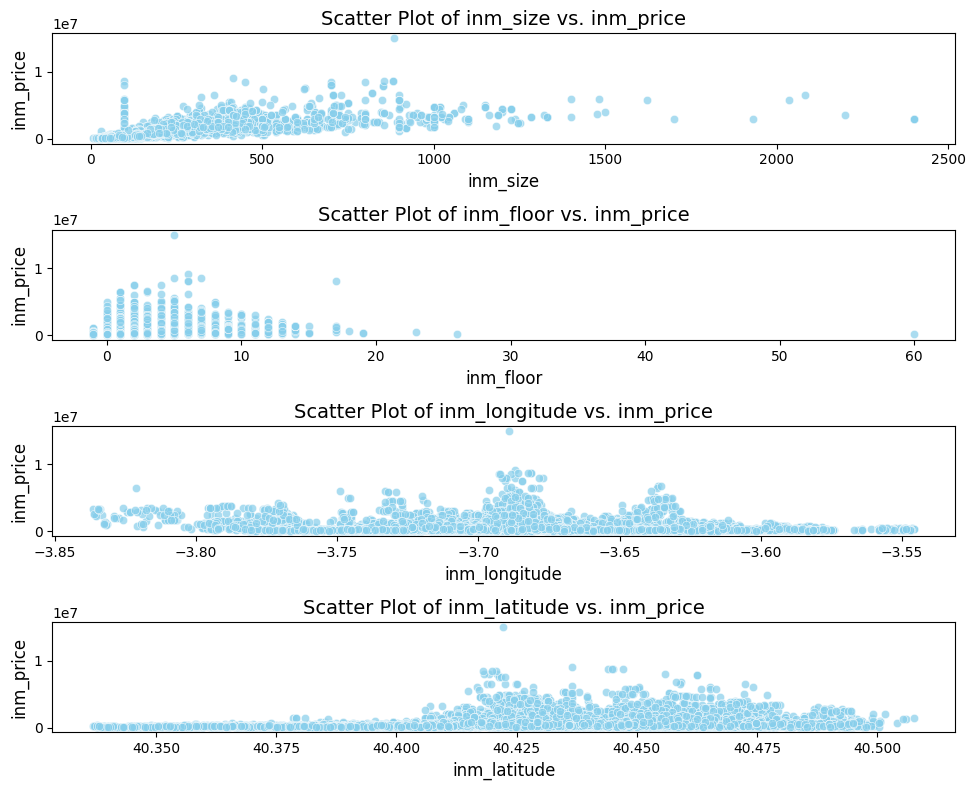

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for scatter plots
numerical_features = ['inm_size', 'inm_floor', 'inm_longitude', 'inm_latitude']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 8), sharex=False)

# Iterate over numerical features and create scatter plots
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='inm_price', ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(f'Scatter Plot of {feature} vs. inm_price', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('inm_price', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


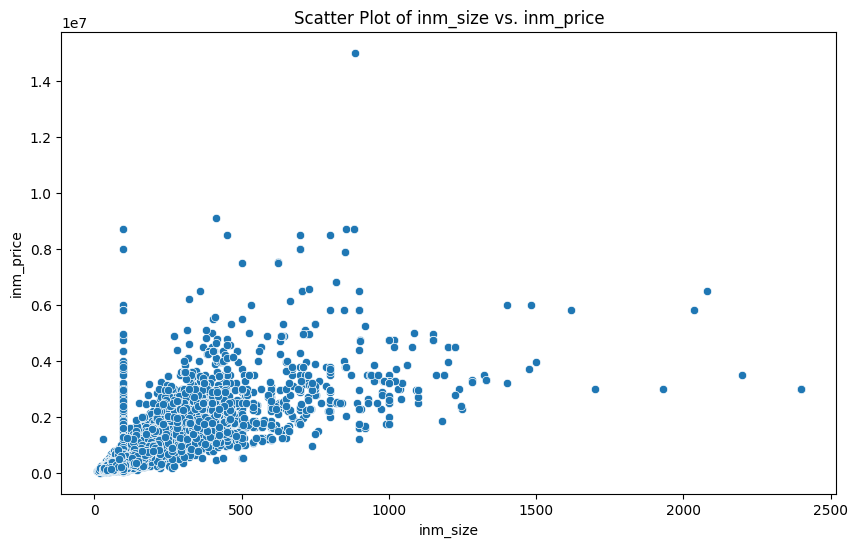

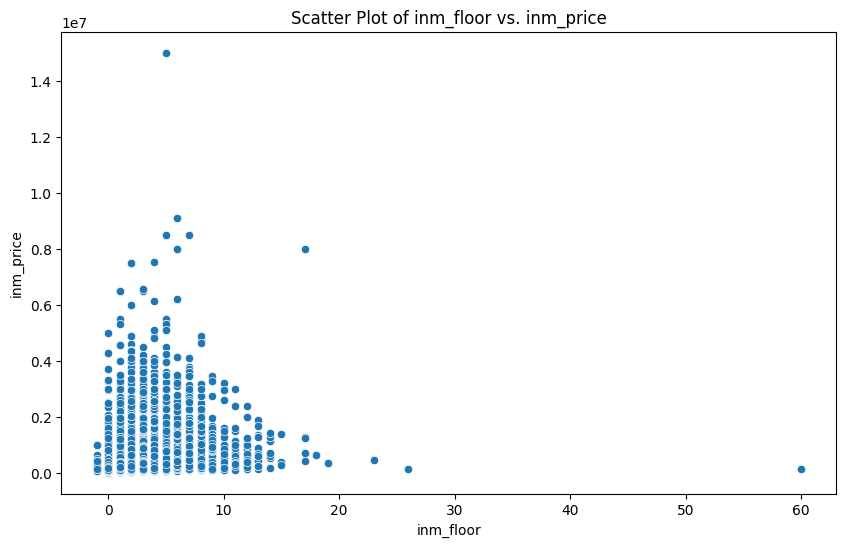

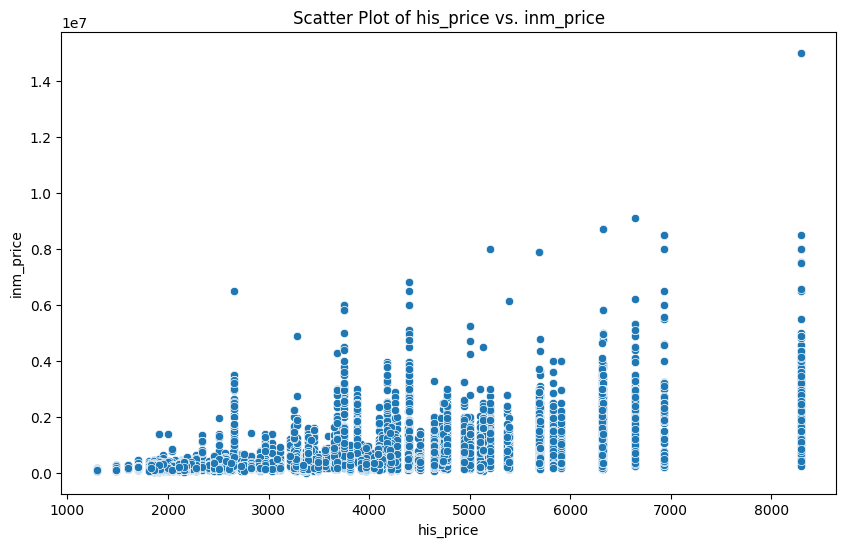

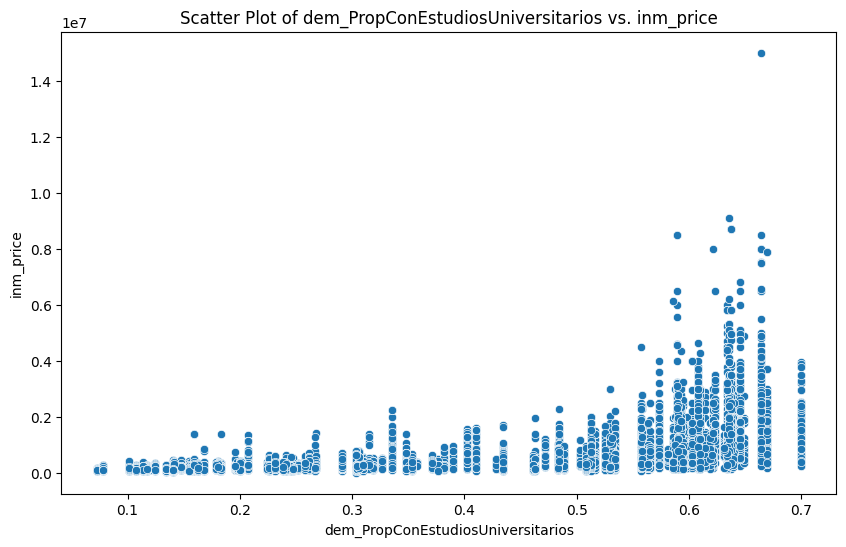

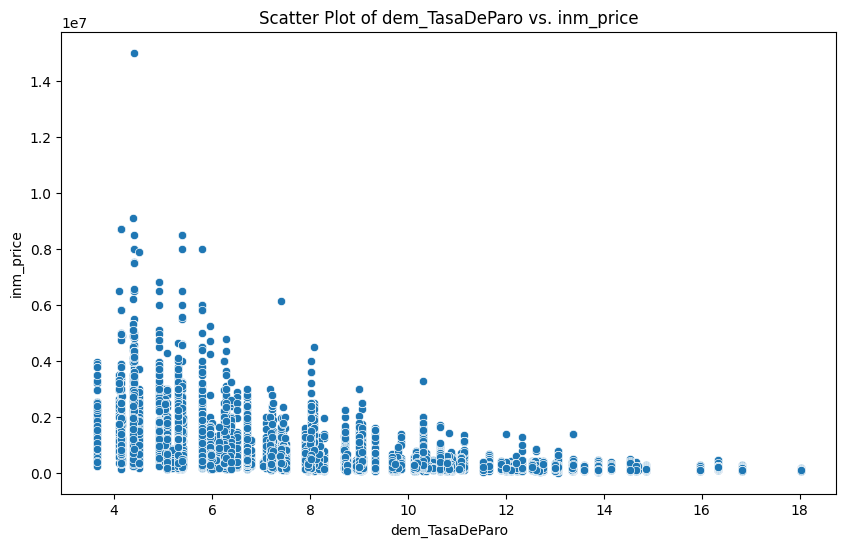

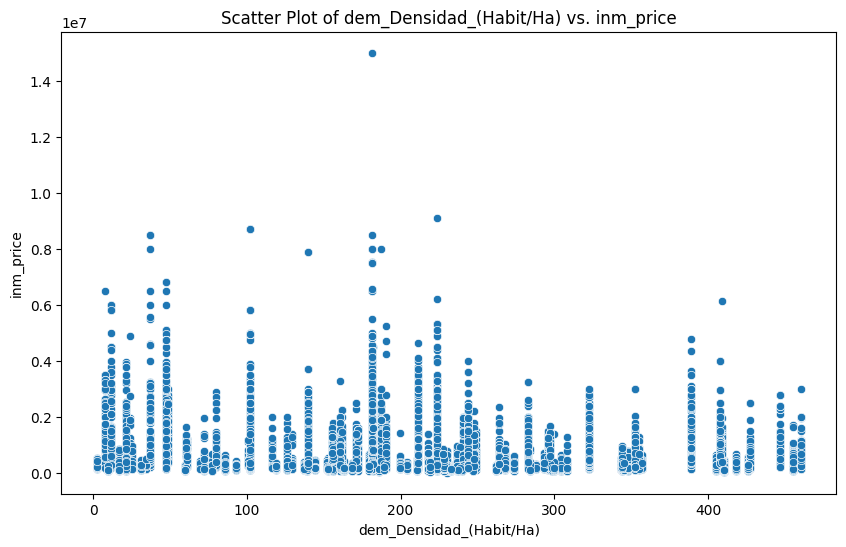

In [14]:
# List of variables to create scatter plots for
variables_to_plot = ['inm_size', 'inm_floor', 'his_price', 'dem_PropConEstudiosUniversitarios', 
                     'dem_TasaDeParo', 'dem_Densidad_(Habit/Ha)']

# Create scatter plots
for var in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='inm_price')
    plt.title(f'Scatter Plot of {var} vs. inm_price')
    plt.xlabel(var)
    plt.ylabel('inm_price')
    plt.show()


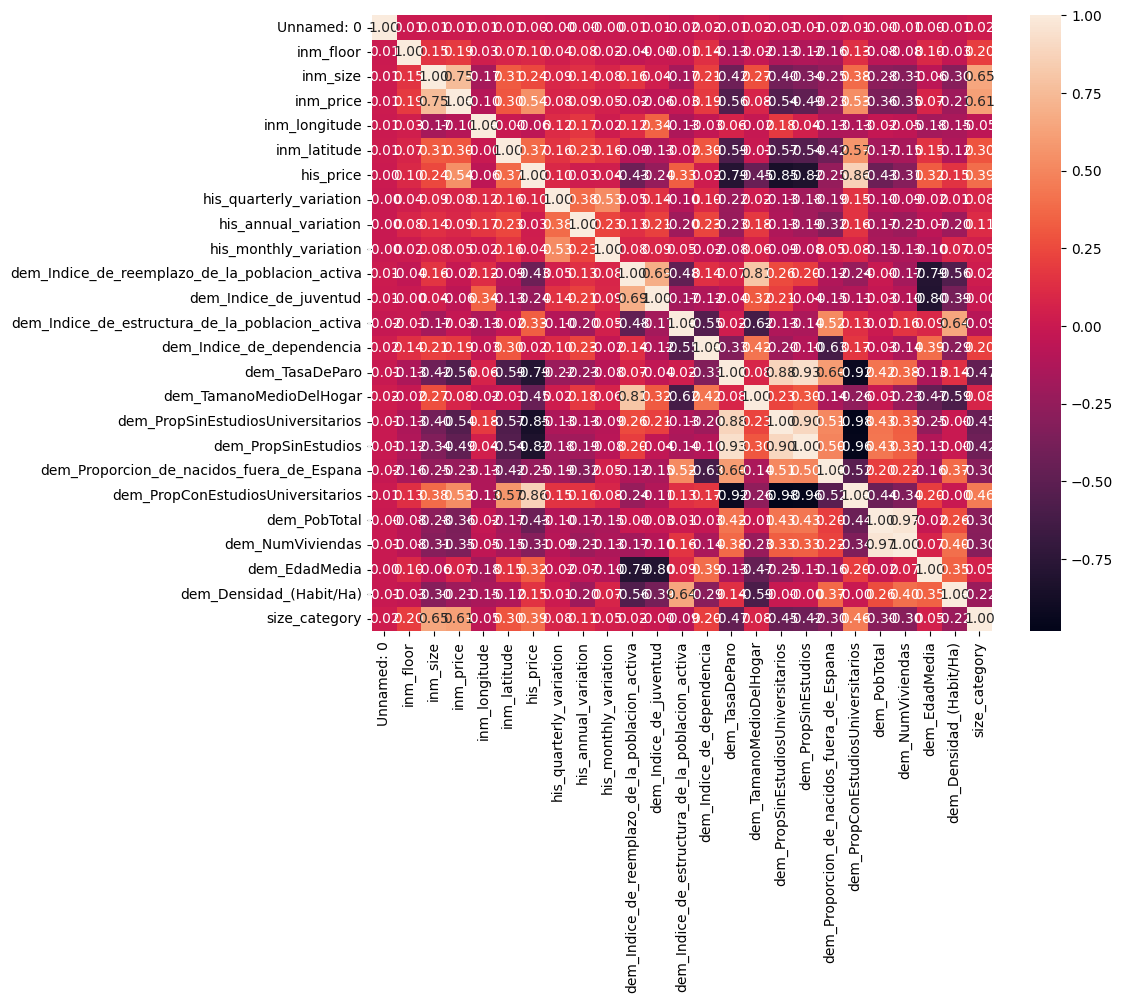

In [13]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Property Size (inm_size): This variable shows a strong positive correlation with inm_price, which suggests that as the size of a property increases, the price tends to increase as well. This is a common finding in real estate markets, where larger properties generally command higher prices.

Property Floor (inm_floor): There seems to be a moderate positive correlation between the floor level of a property and its price. This might reflect a preference for higher floors, possibly due to better views or a perceived increase in status or desirability.

Geographic Coordinates: Both inm_longitude and inm_latitude show some level of correlation with inm_price, though it's not particularly strong. This could indicate that there are certain preferable locations within the geographical scope of the dataset that command higher prices. However, the correlation is not so strong as to suggest that location alone is a primary driver of price.

Historical Price Variations: The historical price (his_price) and its variations (quarterly, annual, monthly) have some degree of correlation with the current price, suggesting that past market trends can be somewhat indicative of current pricing.

Demographics:

Unemployment Rate (dem_TasaDeParo): This shows a slight negative correlation with inm_price, implying that areas with higher unemployment may have lower property prices.
Proportion with University Education (dem_PropConEstudiosUniversitarios): There is a noticeable positive correlation with inm_price, potentially indicating that areas with a higher educated populace have more expensive properties.
Population Density (dem_Densidad_(Habit/Ha)): This shows a correlation with inm_price, which could be interpreted as areas with higher density having higher property prices, possibly due to the urban setting.
Correlation Among Demographic Features: Many demographic features are correlated with each other. For example, dem_PropConEstudiosUniversitarios (proportion with university studies) might be correlated with dem_TasaDeParo (unemployment rate). This inter-correlation will need to be accounted for during modeling to avoid multicollinearity.